In [117]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [118]:
data0 = pd.read_csv('completeBIASED3.csv')
data0.head()

,Have_IP,Have_At,Sub_domains,Redirection,https_Domain,TinyURL,Prefix/Suffix,DNS,Domain_Age,PageRank,forwarding,NameServer,Label
0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,0,1,0


In [119]:
data0.shape

(10000, 13)

In [120]:
data0.columns

Index(['Have_IP', 'Have_At', 'Sub_domains', 'Redirection', 'https_Domain',
       'TinyURL', 'Prefix/Suffix', 'DNS', 'Domain_Age', 'PageRank',
       'forwarding', 'NameServer', 'Label'],
      dtype='object')

In [121]:
data0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Have_IP        10000 non-null  int64
 1   Have_At        10000 non-null  int64
 2   Sub_domains    10000 non-null  int64
 3   Redirection    10000 non-null  int64
 4   https_Domain   10000 non-null  int64
 5   TinyURL        10000 non-null  int64
 6   Prefix/Suffix  10000 non-null  int64
 7   DNS            10000 non-null  int64
 8   Domain_Age     10000 non-null  int64
 9   PageRank       10000 non-null  int64
 10  forwarding     10000 non-null  int64
 11  NameServer     10000 non-null  int64
 12  Label          10000 non-null  int64
dtypes: int64(13)
memory usage: 1015.8 KB


In [122]:
data0.describe()

,Have_IP,Have_At,Sub_domains,Redirection,https_Domain,TinyURL,Prefix/Suffix,DNS,Domain_Age,PageRank,forwarding,NameServer,Label
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.0000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,0.004900,0.024700,0.074400,0.002200,0.0001,0.100700,0.145500,0.049600,0.290000,0.406000,0.166200,0.173800,0.500000
std,0.069832,0.155217,0.262434,0.046855,0.0100,0.300946,0.352622,0.217128,0.453785,0.491109,0.372279,0.378956,0.500025
min,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000
75%,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.0000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [123]:
#Shuffling the data
data = data0.sample(frac=1).reset_index(drop=True)
data.head()

,Have_IP,Have_At,Sub_domains,Redirection,https_Domain,TinyURL,Prefix/Suffix,DNS,Domain_Age,PageRank,forwarding,NameServer,Label
0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,1


In [124]:
#Splitting the data
y = data['Label']
X = data.drop('Label',axis=1)
X.shape, y.shape

((10000, 12), (10000,))

In [125]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.2, random_state = 12)
X_train.shape, X_test.shape

((8000, 12), (2000, 12))

In [126]:
#Using Random forrest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# instantiate the model
forest = RandomForestClassifier(max_depth=13)

# fit the model 
forest.fit(X_train, y_train)

RandomForestClassifier(max_depth=13)

In [127]:
#predicting the target value from the model for the samples
y_test_forest = forest.predict(X_test)
y_train_forest = forest.predict(X_train)
# y_train_forest[:10]

In [128]:
acc_train_forest = accuracy_score(y_train,y_train_forest)
acc_test_forest = accuracy_score(y_test,y_test_forest)

print("Random forest: Accuracy on training Data: {:.3f}".format(acc_train_forest))
print("Random forest: Accuracy on test Data: {:.3f}".format(acc_test_forest))

Random forest: Accuracy on training Data: 0.893
Random forest: Accuracy on test Data: 0.890


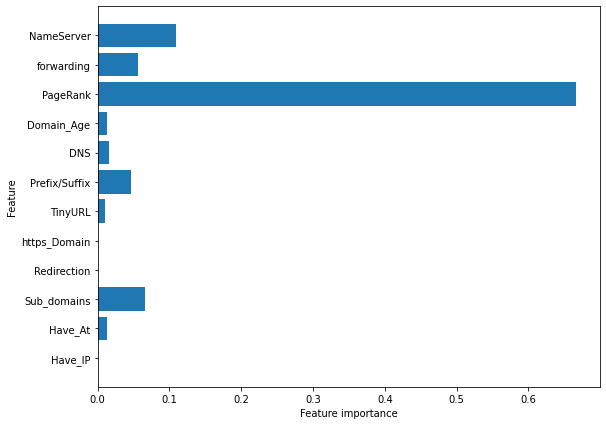

In [129]:
plt.figure(figsize=(9,7))
n_features = X_train.shape[1]
plt.barh(range(n_features), forest.feature_importances_, align='center')
plt.yticks(np.arange(n_features), X_train.columns)
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()

In [130]:
import joblib

In [131]:
joblib.dump(forest, 'RF_Final_Final_2022.pkl')

['RF_Final_Final_2022.pkl']

In [132]:
from urllib.parse import urlparse,urlencode
# import ipaddress
import re

In [133]:
import re
from urllib.parse import urlparse,urlencode
from bs4 import BeautifulSoup 
import whois
import urllib
import urllib.request
from datetime import datetime







# 1.Checks for IP address in URL (Have_IP)
def havingIP(url):
    match=re.search('(([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\/)|'  
                    '((0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\/)'  
                    '(?:[a-fA-F0-9]{1,4}:){7}[a-fA-F0-9]{1,4}',url)    
    if match:
        return 1 
    else:
        return 0
     


# 2.Checks the presence of @ in URL (Have_At)
def haveAtSign(url):
    if "@" in url:
        at = 1    
    else:
        at = 0    
    return at


# #3.Finding the length of URL and categorizing (URL_Length)
# def getLength(url):
#     if len(url) < 54:
#         length = 0            
#     else:
#         length = 1  
#     return length


# 4.Finding the number of subdomains
def getSub_domains(url):
    url =urlparse(url).netloc
    if url.count(".") < 4:
        return 0                  
    else:
        return 1 



# 5.Checking for redirection '//' in the url (Redirection)

def redirection(url):
    if "//" in urlparse(url).path:
        return 1           
    else:
        return 0 


# 6.Existence of “HTTPS” Token in the Domain Part of the URL (https_Domain)
def httpDomain(url):
    domain = urlparse(url).netloc
    if 'https' in domain:
        return 1
    else:
        return 0



shortening_services = r"bit\.ly|goo\.gl|shorte\.st|go2l\.ink|x\.co|ow\.ly|t\.co|tinyurl|tr\.im|is\.gd|cli\.gs|" \
                      r"yfrog\.com|migre\.me|ff\.im|tiny\.cc|url4\.eu|twit\.ac|su\.pr|twurl\.nl|snipurl\.com|" \
                      r"short\.to|BudURL\.com|ping\.fm|post\.ly|Just\.as|bkite\.com|snipr\.com|fic\.kr|loopt\.us|" \
                      r"doiop\.com|short\.ie|kl\.am|wp\.me|rubyurl\.com|om\.ly|to\.ly|bit\.do|t\.co|lnkd\.in|db\.tt|" \
                      r"qr\.ae|adf\.ly|goo\.gl|bitly\.com|cur\.lv|tinyurl\.com|ow\.ly|bit\.ly|ity\.im|q\.gs|is\.gd|" \
                      r"po\.st|bc\.vc|twitthis\.com|u\.to|j\.mp|buzurl\.com|cutt\.us|u\.bb|yourls\.org|x\.co|" \
                      r"prettylinkpro\.com|scrnch\.me|filoops\.info|vzturl\.com|qr\.net|1url\.com|tweez\.me|v\.gd|" \
                      r"tr\.im|link\.zip\.net"
# 7. Checking for Shortening Services in URL (Tiny_URL)
def tinyURL(url):
    match=re.search(shortening_services,url)
    if match:
        return 1
    else:
        return 0
    
    
# 8.Checking for Prefix or Suffix Separated by (-) in the Domain (Prefix/Suffix)
def prefixSuffix(url):
#     suf="http://"+url
    if '-' in urlparse(url).netloc:
        return 1            
    else:
        return 0   
    
    
    
# 9. Checking whether such domain exists or not  
def dns(url):
    try:
        check_hostname = whois.whois(url)
        return 0
    except:
        return 1  
    
    
#10.  Checking age of domain   
def find_DomainAge(site_name):
    try:
        site_name=urlparse(site_name).netloc #comment when using url that doesnt have https
        data=whois.whois(site_name)
        data=data.creation_date
        try:
            if data[1]!= None: #Some of the site data comes with two creation/expiration date
                data=str(data[0])
        except:
            data=str(data)
        
        data=data.split(" ")
#         print(data[0])
        data = datetime.strptime(data[0],'%Y-%m-%d')
        data1=whois.whois(site_name)
        data1=data1.expiration_date
        try:
            if data1[1]!= None:
                data1=str(data1[0])
        except:
            data1=str(data1)
        
        data1=data1.split(" ")
#         print(data1[0])
        data1 = datetime.strptime(data1[0],'%Y-%m-%d')
#         print(data1-data)
        ageofdomain = abs((data1 - data).days)
        ageofdomain=int(ageofdomain/30)
        print(ageofdomain)
        if ageofdomain > 12:
            return 0
        else:
            return 1        
    except:
        print("error")
        return 1   
    
    

    
    
    
    
    
    
#11. Check Page Rank
import requests
import sys
from bs4 import BeautifulSoup
import re
import validators
import locale

locale.setlocale( locale.LC_ALL, 'en_US.UTF-8' ) 
# locale.atoi('1,000,000')

alexa_base_url = 'https://alexa.com/siteinfo/'

def is_valid_domain(site_name):
    timeout = 5
    if validators.domain(site_name): #checks if it is a domain name alexa.com and not http://alexa.com and not even domain with path
        url_for_rank = alexa_base_url + site_name
        page = requests.get(url_for_rank, timeout = timeout)
        soup = BeautifulSoup(page.content, 'html.parser')
        global_rank = soup.select('.rank-global .data')
        try:
            match = re.search(r'[\d,]+', global_rank[0].text.strip())
            entry = locale.atoi(match.group())
            if entry<100000:
#                 print("Safe")
#                 print("Global Rank: ", match.group())
                return 0
            else:
#                 print("Not Safe")
#                 print("Global Rank: ", match.group())
                return 0
        except:
#             print("No global rank found for ", site_name)
            return 1
    else:
#         print("Not a domain")
        return 1
        
    
def check_valid_domain(url):
    site_name = url
    site_name.lower()
    site_name1=urlparse(site_name).netloc
    num_check = len(site_name1)
    if num_check==0:
        try:
            site_name="https://"+site_name
            site_name=urlparse(site_name).netloc
            print(site_name)
            return is_valid_domain(site_name)
#             whois.whois(site_name)
            
        except:
            return 1
#             print("error1")
            
    else:
        try:
            return is_valid_domain(site_name1)
#             whois.whois(site_name)
    
        except:
            return 1
#             print("error2")
        
               
     
        
def forwarding(url):
    try:
        response = requests.get(url, timeout=5)
        print(response.history)
        if response == "":
            return 1
        else:
            if len(response.history) <=2 :
                return 0
            else:
                print(response.history)
                return 1
    except:
        return 1
    
    
    
    
import requests
import json
import whois

# 0 for safe
# 1 for unsafe

SAFE = 0
UNSAFE = 1
# httpCode = 0
def isUrlMatchesNameServer(url):
	try:
		response = requests.get(url, timeout=5)
		result = response.history
		httpCode = 0
		for i in result:
			if str(i) == "<Response [301]>":
				httpCode = 301
				break

		if httpCode == 301:
			r = requests.get(url, timeout=5)
			finalUrl = r.url

			# Not neccesary but let's say even after 5 redirects end result/url is same
			# Return safe
			print(url, finalUrl)
			if url != finalUrl:
				try:
					jsonStartUrl = json.loads(str(whois.whois(url)))
					jsonFinalUrl = json.loads(str(whois.whois(finalUrl)))
					jsonStartUrlNameServers = list(jsonStartUrl["name_servers"])
					jsonFinalUrlNameServers = list(jsonFinalUrl["name_servers"])
					#print(jsonStartUrlNameServers, jsonFinalUrlNameServers)

					if len(jsonStartUrlNameServers) > 0 and len(jsonFinalUrlNameServers):

						# Check if both list contains atleast 1, item that is common
						if not set(jsonStartUrlNameServers).isdisjoint(jsonFinalUrlNameServers):
							return SAFE
						else:
							return UNSAFE
					else:
						return UNSAFE
				except Exception as e:
					#raise e
					return UNSAFE
			else:
				return SAFE
		else:
			return SAFE
	except:
		return UNSAFE

    
    
    
    
    
#Function to extract features
def featureExtraction(url):
    features = []
    features.append(havingIP(url))
    features.append(haveAtSign(url))
#     features.append(getLength(url))
    features.append(getSub_domains(url))
    features.append(redirection(url))
    features.append(httpDomain(url))
    features.append(tinyURL(url))
    features.append(prefixSuffix(url))
    features.append(dns(url))
    features.append(find_DomainAge(url))
    features.append(check_valid_domain(url))
    features.append(forwarding(url))
    features.append(isUrlMatchesNameServer(url))
#     features.append(label)  
    return features

In [139]:
legi_features = []
url="https://web.whatsapp.com/"
legi_features.append(featureExtraction(url))
print(legi_features)
a=legi_features
b=forest.predict(a)
print(b)
c=forest.predict_proba(a)
# print(b)
# c=list(c)
print(c)

280
[]
[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]
[0]
[[0.84973314 0.15026686]]


In [135]:
whois.whois("https://user-login-amazno.yeduan.top/)

SyntaxError: EOL while scanning string literal (<ipython-input-135-21ae95c7eec7>, line 1)